In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

Text(0, 0.5, 'y')

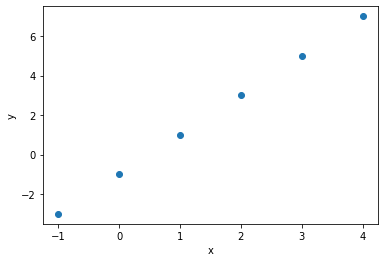

In [2]:
x = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype = float)

# Plot data
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

In [3]:
# Neural Network
number_of_nodes = 1
my_layer = tf.keras.layers.Dense(number_of_nodes, activation = 'linear', input_shape = [1])
model = tf.keras.Sequential([my_layer])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [4]:
model.fit(x, y, epochs = 500, verbose = 1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.8907
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 2.4289
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 2.0624
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.7709
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1.5386
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 1.3528
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2037
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0835
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9862
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9069
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8418
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7879
Epoch 13/500
1/1 [==============================] - 0s 6ms/s

y(10.0) =  18.985266
Layer weights are: [array([[1.9978645]], dtype=float32), array([-0.99337894], dtype=float32)]


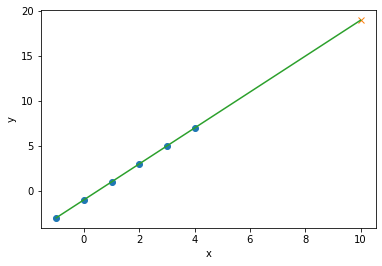

In [5]:
# Making predictions
xp = 10.0
yp = model.predict([xp])
print('y(10.0) = ', yp[0][0])
print('Layer weights are: {}'.format(my_layer.get_weights()))

# Plot data and prediction
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
# Plot predictions:
plt.plot(xp, yp, 'x')
W = my_layer.get_weights()
m = W[0][0,0]
b = W[1][0]
x_line = np.linspace(-1.0, 10.0)
y_line = m*x_line + b
plt.plot(x_line,y_line);

## Part 2

(96979, 785) (10000, 785) (2000, 785)
This is a(n)  helicopter , index =  2


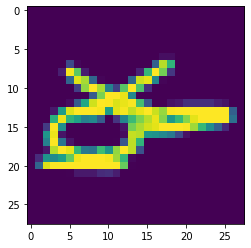

In [6]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# DATA
all_data = np.load('small_subset.npy')
train_and_validation_data, test_data = train_test_split(all_data, test_size = 2000)
train_data, validation_data = train_test_split(train_and_validation_data, test_size = 10000)
print(train_data.shape, validation_data.shape, test_data.shape)

train_dataset      = tf.data.Dataset.from_tensor_slices((train_data[:,0:783], train_data[:,784]))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_data[:,0:783], validation_data[:,784]))
test_dataset       = tf.data.Dataset.from_tensor_slices((test_data[:,0:783],  test_data[:,784]))

train_dataset      = train_dataset.shuffle(100000).batch(64)
validation_dataset = validation_dataset.shuffle(100000).batch(64)
test_dataset       = test_dataset.batch(64)

index = random.randint(0,len(all_data))
a = all_data[index,0:784].reshape((28,28))
plt.imshow(a)
labl = {0:'airplane',1:'dragon',2:'helicopter'}
print('This is a(n) ', labl[all_data[index,784]], ', index = ', all_data[index,784])

In [7]:
# MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'sigmoid', input_shape = [783]),
    tf.keras.layers.Dense(64,  activation = 'sigmoid'),
    tf.keras.layers.Dense(64,  activation = 'sigmoid'),
    tf.keras.layers.Dense(3,   activation = 'softmax')
])

model.compile(optimizer = 'adam', # tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100352    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 112,963
Trainable params: 112,963
Non-trainable params: 0
_________________________________________________________________


In [14]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [15]:
history = model.fit(train_dataset, epochs = 30, validation_data = validation_dataset, verbose = 1)
history.history

Epoch 1/30
1516/1516 [==============================] - 10s 6ms/step - loss: 0.6322 - sparse_categorical_accuracy: 0.7336 - val_loss: 0.6397 - val_sparse_categorical_accuracy: 0.7239
Epoch 2/30
1516/1516 [==============================] - 9s 6ms/step - loss: 0.6360 - sparse_categorical_accuracy: 0.7316 - val_loss: 0.6291 - val_sparse_categorical_accuracy: 0.7327
Epoch 3/30
1516/1516 [==============================] - 8s 6ms/step - loss: 0.6206 - sparse_categorical_accuracy: 0.7381 - val_loss: 0.6066 - val_sparse_categorical_accuracy: 0.7427
Epoch 4/30
1516/1516 [==============================] - 8s 5ms/step - loss: 0.6045 - sparse_categorical_accuracy: 0.7461 - val_loss: 0.5983 - val_sparse_categorical_accuracy: 0.7491
Epoch 5/30
1516/1516 [==============================] - 10s 7ms/step - loss: 0.5929 - sparse_categorical_accuracy: 0.7535 - val_loss: 0.6194 - val_sparse_categorical_accuracy: 0.7392
Epoch 6/30
1516/1516 [==============================] - 13s 9ms/step - loss: 0.5881 - sp

{'loss': [0.6321836709976196,
  0.6360307931900024,
  0.6205558776855469,
  0.6045495867729187,
  0.59287428855896,
  0.5881059765815735,
  0.5912299752235413,
  0.5883073806762695,
  0.5805460214614868,
  0.5831001996994019,
  0.5797666907310486,
  0.576746940612793,
  0.5654237866401672,
  0.5609045028686523,
  0.5626073479652405,
  0.561430811882019,
  0.5525197386741638,
  0.5591075420379639,
  0.55286705493927,
  0.5482615828514099,
  0.5497526526451111,
  0.5420982837677002,
  0.539349377155304,
  0.5360383987426758,
  0.5305811762809753,
  0.5297185182571411,
  0.5286099910736084,
  0.5300739407539368,
  0.5298283696174622,
  0.5294625759124756],
 'sparse_categorical_accuracy': [0.7336330413818359,
  0.7316017150878906,
  0.7380567193031311,
  0.7460893392562866,
  0.7535342574119568,
  0.7549366354942322,
  0.7531011700630188,
  0.7561843395233154,
  0.7590921521186829,
  0.7581847906112671,
  0.7587518692016602,
  0.7583600282669067,
  0.7663514614105225,
  0.7702183127403259,

In [16]:
# EVALUATION
model.evaluate(test_dataset)

32/32 [==============================] - 0s 7ms/step - loss: 0.5362 - sparse_categorical_accuracy: 0.7780


[0.5362163782119751, 0.777999997138977]

Ground truth: This is a(n)  helicopter , index =  2
Predicted: [[0.07743587 0.06246705 0.8600971 ]]


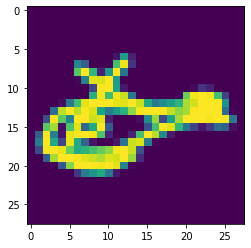

In [17]:
#predict individual examples
index = random.randint(0,len(test_data))
a = test_data[index,0:784].reshape((28,28))
plt.imshow(a)

ex = test_data[index,0:783]
print('Ground truth: This is a(n) ', labl[test_data[index,784]], ', index = ', test_data[index,784])
prediction = model.predict(np.array([ex,]))
print('Predicted:', prediction)

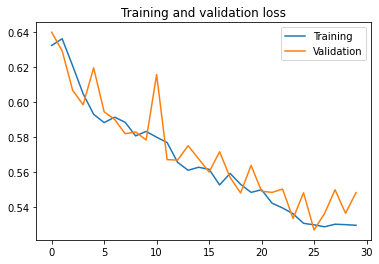

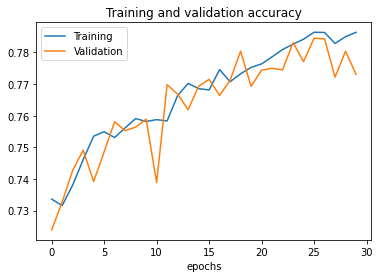

In [18]:
# PLOT learning curves
epochs  = range(len(history.history['loss']))# Get number of epochs
plt.plot  ( epochs,     history.history['loss' ], label='Training')
plt.plot  ( epochs, history.history['val_loss' ], label='Validation')
plt.title ('Training and validation loss')
plt.legend()

plt.figure()
plt.plot  ( epochs,     history.history[     'sparse_categorical_accuracy' ], label='Training')
plt.plot  ( epochs, history.history[     'val_sparse_categorical_accuracy' ], label='Validation')
plt.legend()
plt.title ('Training and validation accuracy')
plt.xlabel('epochs');